### Deep Learning Assignment 2 Testing


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
data_train = pd.read_csv('datasets/no1_train.csv')
data_valid = pd.read_csv('datasets/no1_validation.csv')

data_train['y*'] = data_train['y']
data_valid['y*'] = data_valid['y']

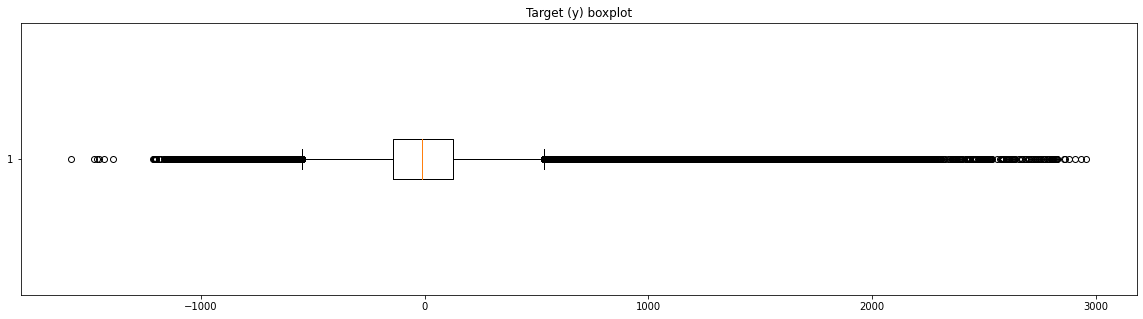

In [3]:
def show_boxplot(dataframe, column):
    """
    Show a boxplot of the data in the given column of the given dataframe.
    """
    plt.figure(figsize=(20, 5))
    plt.title('Target (y) boxplot')
    plt.boxplot(dataframe[column], vert=False)
    plt.show()

show_boxplot(data_train, 'y*')

#### Remove outliers

Using winsorization, bound 1% of the outliers to maximum and minimum values.

In [4]:
def winsorize_one_percent(data):
    """
    Winsorizes the data in the y*-column. This is done by setting the upper 
    0.5% and lower 0.5% to an upper and a lower bound.
    """
    winsorized = winsorize(data['y*'], limits=[0.005, 0.005])
    data['y*'] = np.array(winsorized)
    return data

data_train = winsorize_one_percent(data_train)

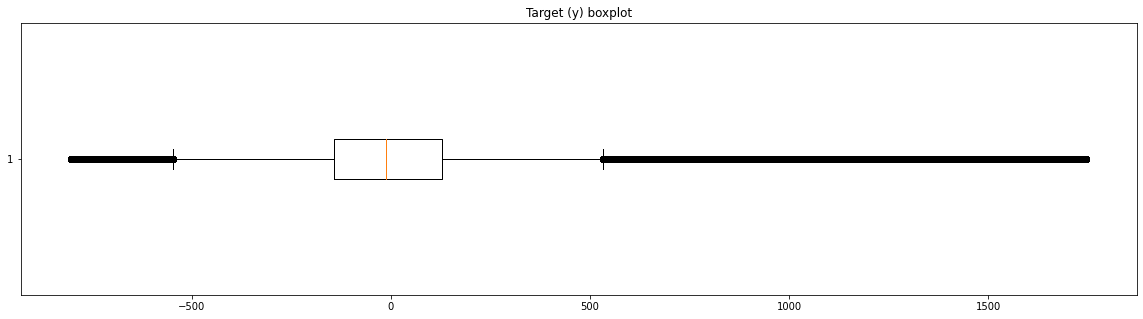

In [5]:
show_boxplot(data_train, 'y*')

In [6]:
def normalize_data(data, new_min: int = 0, new_max: int = 1):
    """
    Normalizes the given data in the 'y*'-column using the rescaling method.
    The new data is stored in a new column called 'y*norm' and is by default 
    in the range [0, 1]. This range can be customized using the params
    new_min and new_max.
    """
    col = data['y*']
    data['y*norm'] = new_min + ((col - col.min()) / (col.max() - col.min())) * (new_max-new_min)

# normalize_data(data_train, new_min=-1, new_max=1)
normalize_data(data_train)

In [7]:
def standardize_data(data):
    """
    Standardizes the given data in the 'y*'-column using Z-score normalization.
    The mean of the column is subtracted from all values and the resulting
    values are divided by the standard deviation.
    """
    col = data['y*']
    mean = col.mean()
    std = col.std()
    data['y*std'] = (col - mean) / std

standardize_data(data_train)

In [18]:
# Add shifted y value as y_previous
data_train['y*norm_prev'] = data_train['y*norm'].shift(1)
data_train['y*std_prev'] = data_train['y*std'].shift(1)

# Add shifted y value as y_previous
# data_valid['y*norm_prev'] = data_valid['y*norm'].shift(1)

data_train

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,y*,y*norm,y*std,y*norm_prev,y*std_prev
0,2019-01-09 14:10:00,1591.839,141.928,11.5,74.428,0.0,1819.695,341.330021,10.0,-4417.4,341.330021,0.449041,1.079338,NaN,NaN
1,2019-01-09 14:15:00,1591.839,141.928,11.5,74.428,0.0,1819.695,330.114330,10.0,-4417.4,330.114330,0.444638,1.043029,0.449041,1.079338
2,2019-01-09 14:20:00,1591.839,141.928,11.5,74.428,0.0,1819.695,323.877221,10.0,-4417.4,323.877221,0.442189,1.022837,0.444638,1.043029
3,2019-01-09 14:25:00,1591.839,141.928,11.5,74.428,0.0,1819.695,296.438463,10.0,-4417.4,296.438463,0.431418,0.934009,0.442189,1.022837
4,2019-01-09 14:30:00,1591.839,141.928,11.5,74.428,0.0,1819.695,269.097132,10.0,-4417.4,269.097132,0.420684,0.845496,0.431418,0.934009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,1942.486,191.881,20.1,106.431,0.0,2266.098,141.618915,0.0,-2252.9,141.618915,0.370639,0.432808,0.370407,0.430889
225084,2021-03-01 03:10:00,1942.486,191.881,20.1,106.431,0.0,2266.098,129.043820,0.0,-2252.9,129.043820,0.365703,0.392098,0.370639,0.432808
225085,2021-03-01 03:15:00,1942.486,191.881,20.1,106.431,0.0,2266.098,94.907548,0.0,-2252.9,94.907548,0.352302,0.281588,0.365703,0.392098
225086,2021-03-01 03:20:00,1942.486,191.881,20.1,106.431,0.0,2266.098,102.589040,0.0,-2252.9,102.589040,0.355317,0.306456,0.352302,0.281588


### Feature engineering

### Date and time features

I will add date and time features to the dataset, dervied from the 'start_time'-column, but with values usable by the neural network.

In [46]:
day_of_year = pd.to_datetime(data_train['start_time']).dt.day_of_year
day_of_week = pd.to_datetime(data_train['start_time']).dt.day_of_week
hour_of_day = pd.to_datetime(data_train['start_time']).dt.hour
data_train['day_of_year'] = day_of_year
data_train['day_of_week'] = day_of_week 
data_train['hour_of_day'] = hour_of_day
data_train

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,y*,y*norm,y*std,y*norm_prev,y*std_prev,day_of_year,day_of_week,hour_of_day
0,2019-01-09 14:10:00,1591.839,141.928,11.5,74.428,0.0,1819.695,341.330021,10.0,-4417.4,341.330021,0.449041,1.079338,NaN,NaN,9,2,14
1,2019-01-09 14:15:00,1591.839,141.928,11.5,74.428,0.0,1819.695,330.114330,10.0,-4417.4,330.114330,0.444638,1.043029,0.449041,1.079338,9,2,14
2,2019-01-09 14:20:00,1591.839,141.928,11.5,74.428,0.0,1819.695,323.877221,10.0,-4417.4,323.877221,0.442189,1.022837,0.444638,1.043029,9,2,14
3,2019-01-09 14:25:00,1591.839,141.928,11.5,74.428,0.0,1819.695,296.438463,10.0,-4417.4,296.438463,0.431418,0.934009,0.442189,1.022837,9,2,14
4,2019-01-09 14:30:00,1591.839,141.928,11.5,74.428,0.0,1819.695,269.097132,10.0,-4417.4,269.097132,0.420684,0.845496,0.431418,0.934009,9,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,1942.486,191.881,20.1,106.431,0.0,2266.098,141.618915,0.0,-2252.9,141.618915,0.370639,0.432808,0.370407,0.430889,60,0,3
225084,2021-03-01 03:10:00,1942.486,191.881,20.1,106.431,0.0,2266.098,129.043820,0.0,-2252.9,129.043820,0.365703,0.392098,0.370639,0.432808,60,0,3
225085,2021-03-01 03:15:00,1942.486,191.881,20.1,106.431,0.0,2266.098,94.907548,0.0,-2252.9,94.907548,0.352302,0.281588,0.365703,0.392098,60,0,3
225086,2021-03-01 03:20:00,1942.486,191.881,20.1,106.431,0.0,2266.098,102.589040,0.0,-2252.9,102.589040,0.355317,0.306456,0.352302,0.281588,60,0,3
